> **Project Introduction**: In this project, we analyzed a movie dataset to understand trends in movie popularity and revenue. We cleaned the data by addressing missing values, converting data types, and exploding list-type columns like 'genres' and 'cast'. After cleaning, we focused on two main analyses: identifying the most popular genres over time and exploring the characteristics of movies with high revenues. This helped us derive insights into the types of movies that perform well financially and which genres dominate the film industry each year.

# Project: Investigate a Dataset - [TMDb movie data ]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.


### Question(s) for Analysis
Which genres are most popular from year to year?
What kinds of properties are associated with movies that have high revenues?
What are the top ten highest-revenue films?

In [47]:

# import pandas, numpy , matplot and load datasets
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt



<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations initially. This does not have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, trim the excess and organize your steps so that you have a flowing, cohesive report.

In [48]:
# Load your data and print out a few lines.
#  take a look at the dataset 
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [49]:
 # view dimensions of dataset
df.shape

(10866, 21)

In [50]:
# Check for any missing values or data type errors.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       


### Data Cleaning
> : When I reviewed the data, I found missing values, columns that needed data type changes, and the 'genres' column needed to be exploded.
 

In [51]:
#1. Clean up columns that contain multiple values like 'cast' and 'genres'
# Split 'cast' and 'genres' into separate lists


# Split the 'cast' column values by '|' and convert to list if the value is a string, otherwise assign an empty list
df['cast'] = df['cast'].apply(lambda x: x.split('|') if isinstance(x, str) else [])

# Split the 'genres' column values by '|' and convert to list if the value is a string, otherwise assign an empty list
df['genres'] = df['genres'].apply(lambda x: x.split('|') if isinstance(x, str) else [])



In [52]:
# Keep only the rows where the 'genres' column is not an empty list
df = df[df['genres'].apply(lambda x: len(x) > 0)]

In [53]:
#Change release_date data type from object to date
df['release_date'] = pd.to_datetime(df['release_date'])

In [54]:
#Change popularity data type to integer
df['popularity'] = df['popularity'].astype('int32')

In [55]:
#Rename columns for clarity.
df.rename(columns={'budget_adj': 'adjusted_budget'}, inplace=True)
df.rename(columns={'revenue_adj': 'adjusted_revenue'}, inplace=True)

In [56]:
#Show first row to see column names
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,adjusted_budget,adjusted_revenue
0,135397,tt0369610,32,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


In [57]:
# view missing value count
df.isnull().sum()

id                         0
imdb_id                    8
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                       0
homepage                7912
director                  42
tagline                 2806
keywords                1475
overview                   3
runtime                    0
genres                     0
production_companies    1016
release_date               0
vote_count                 0
vote_average               0
release_year               0
adjusted_budget            0
adjusted_revenue           0
dtype: int64

In [58]:
# drop rows with any null values in datasets
df.dropna(inplace=True)

In [59]:
# checks if any of columns have null values - should print False
df.isnull().sum().any()

False

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Which genres are most popular from year to year? )

In [60]:

# Which genres are most popular from year to year? 

# Use explode to convert lists into separate rows.
df_exploded = df.explode('genres')

# Remove rows with missing (NaN) values in the 'genres' column
df_exploded = df_exploded[df_exploded['genres'].notna()]

# Display the first three rows of the DataFrame df_exploded after filtering
df_exploded.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,adjusted_budget,adjusted_revenue
0,135397,tt0369610,32,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,tt0369610,32,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,tt0369610,32,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


In [61]:
# Now, we aggregate the data by year and gender and calculate the total popularity.
genre_yearly_popularity = df_exploded.groupby(['release_year', 'genres'])['popularity'].sum().reset_index()

# Sort results by popularity from top to bottom
genre_yearly_popularity = genre_yearly_popularity.sort_values(by='popularity', ascending=False)

#This displays the first ten rows in the DataFrame, helping you understand the data more quickly.
genre_yearly_popularity.head(10)

,release_year,genres,popularity
538,2015,Adventure,179
537,2015,Action,167
551,2015,Science Fiction,157
553,2015,Thriller,149
518,2014,Action,120
519,2014,Adventure,119
532,2014,Science Fiction,107
543,2015,Drama,97
534,2014,Thriller,75
524,2014,Drama,70


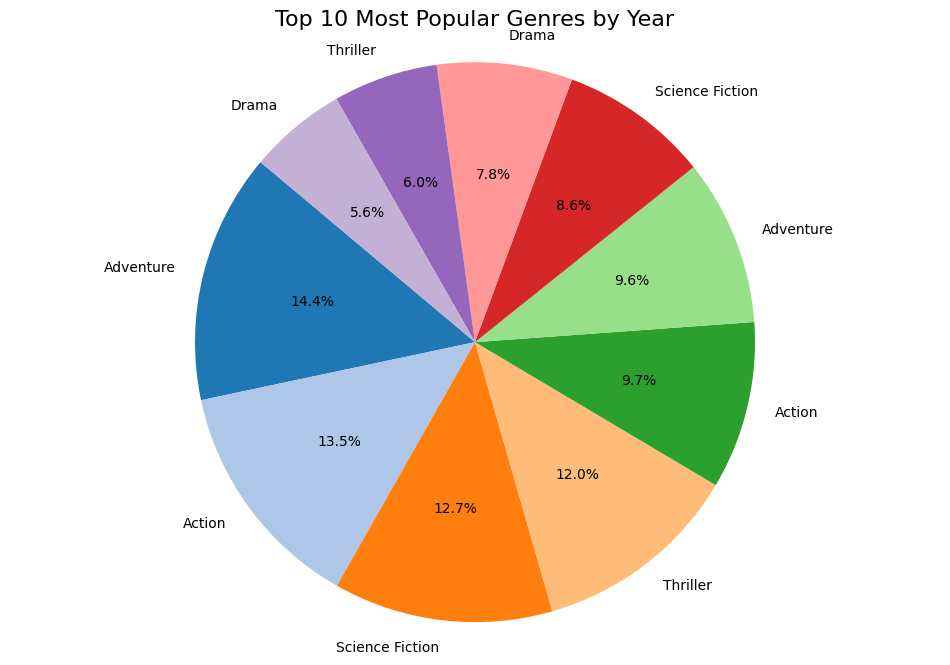

In [62]:
#dentify the top 10 most popular genres to draw Conclusion
top_10_genres = genre_yearly_popularity.head(10)

# Prepare the chart
plt.figure(figsize=(12, 8))

# Draw a pie chart
plt.pie(top_10_genres['popularity'], labels=top_10_genres['genres'], autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)

# Add a title
plt.title('Top 10 Most Popular Genres by Year', fontsize=16)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# View chart
plt.show()

**conclusion** based on the pie chart for the top 10 most popular genres by year:

**Most Popular Genre**: The most popular genre (based on the pie chart) is Adventure, followed by Action and Science Fiction. These genres have the highest cumulative popularity, indicating that movies within these genres tend to capture more audience attention each year.

**Diversity of Popular Genres**: The pie chart shows a clear spread of popularity across different genres, with Thriller, Drama, and others also holding notable portions of the total popularity. This indicates a variety of preferences among audiences, though certain genres dominate more significantly.

**Genre Preferences Over Time**: The data suggests that adventure-themed and action-packed films consistently perform well over the years, while genres like Science Fiction and Thriller also hold their ground, but at a relatively lower popularity compared to the top few genres.

**Insights**:
Filmmakers and producers can focus on genres like Adventure and Action, as they seem to resonate with larger audiences.

There's also room for niche genres like Drama and Thriller, as they continue to hold a steady portion of the audience's interest.

The popularity metric could suggest that these top genres are not just dominant in one year but have a sustained presence across multiple years.

### Research Question 2  (What kinds of properties are associated with movies that have high revenues?)

In [63]:

# What kinds of properties are associated with movies that have high revenues?


#Calculate the average ervenue of the dataset 
mean_revenue = df['adjusted_revenue'].mean()

# Dividing movies into movies with above average revenues and movies with below average revenues
high_revenue_movies = df[df['adjusted_revenue'] >= mean_revenue]
low_revenue_movies = df[df['adjusted_revenue'] < mean_revenue]

# sort of movies with higher than average revenues from top to bottom
high_revenue_movies_sorted = high_revenue_movies.sort_values(by='adjusted_revenue', ascending=False)

# Show properties of high revenue movies 
high_revenue_movies_sorted.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,adjusted_budget,adjusted_revenue
1386,19995,tt0499549,9,237000000,2781505847,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",http://www.avatarmovie.com/,James Cameron,Enter the World of Pandora.,...,"In the 22nd century, a paraplegic Marine is di...",162,"[Action, Adventure, Fantasy, Science Fiction]",Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09
1329,11,tt0076759,12,11000000,775398007,Star Wars,"[Mark Hamill, Harrison Ford, Carrie Fisher, Pe...",http://www.starwars.com/films/star-wars-episod...,George Lucas,"A long time ago in a galaxy far, far away...",...,Princess Leia is captured and held hostage by ...,121,"[Adventure, Action, Science Fiction]",Lucasfilm|Twentieth Century Fox Film Corporation,1977-03-20,4428,7.9,1977,3.957559e+07,2.789712e+09
5231,597,tt0120338,4,200000000,1845034188,Titanic,"[Kate Winslet, Leonardo DiCaprio, Frances Fish...",http://www.titanicmovie.com/menu.html,James Cameron,Nothing on Earth could come between them.,...,"84 years later, a 101-year-old woman named Ros...",194,"[Drama, Romance, Thriller]",Paramount Pictures|Twentieth Century Fox Film ...,1997-11-18,4654,7.3,1997,2.716921e+08,2.506406e+09
10594,9552,tt0070047,2,8000000,441306145,The Exorcist,"[Linda Blair, Max von Sydow, Ellen Burstyn, Ja...",http://theexorcist.warnerbros.com/,William Friedkin,Something almost beyond comprehension is happe...,...,12-year-old Regan MacNeil begins to adapt an e...,122,"[Drama, Horror, Thriller]",Warner Bros.|Hoya Productions,2073-12-26,1113,7.2,1973,3.928928e+07,2.167325e+09
9806,578,tt0073195,2,7000000,470654000,Jaws,"[Roy Scheider, Robert Shaw, Richard Dreyfuss, ...",http://www.jaws25.com/,Steven Spielberg,Don't go in the water.,...,An insatiable great white shark terrorizes the...,124,"[Horror, Thriller, Adventure]",Universal Pictures|Zanuck/Brown Productions,1975-06-18,1415,7.3,1975,2.836275e+07,1.907006e+09
3,140607,tt2488496,11,200000000,2068178225,Star Wars: The Force Awakens,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...",http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,"[Action, Adventure, Science Fiction, Fantasy]",Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
8889,601,tt0083866,2,10500000,792910554,E.T. the Extra-Terrestrial,"[Henry Thomas, Drew Barrymore, Robert MacNaugh...",http://www.et20.com/,Steven Spielberg,He is afraid. He is alone. He is three million...,...,A science fiction fairytale about an extra-ter...,115,"[Science Fiction, Adventure, Family, Fantasy]",Universal Pictures|Amblin Entertainment,1982-04-03,1830,7.2,1982,2.372625e+07,1.791694e+09
4361,24428,tt0848228,7,220000000,1519557910,The Avengers,"[Robert Downey Jr., Chris Evans, Mark Ruffalo,...",http://marvel.com/avengers_movie/,Joss Whedon,Some assembly required.,...,When an unexpected enemy emerges and threatens...,143,"[Science Fiction, Action, Adventure]",Marvel Studios,2012-04-25,8903,7.3,2012,2.089437e+08,1.443191e+09
7309,1891,tt0080684,5,18000000,538400000,The Empire Strikes Back,"[Mark Hamill, Harrison Ford, Carrie Fisher, Bi...",http://www.starwars.com/films/star-wars-episod...,Irvin Kershner,The Adventure Continues...,...,"The epic saga continues as Luke Skywalker, in ...",124,"[Adventure, Action, Science Fiction]",Lucasfilm|Twentieth Century Fox Film Corporation,1980-01-01,3954,8.0,1980,4.762866e+07,1.424626e+09
0,135397,tt0369610,32,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment

**conclusion**: Properties of High Revenue Movies

High Budget: High-revenue films typically have large budgets, often in the hundreds of millions (e.g., Avatar with $237 million).

Famous Directors: Well-known directors like James Cameron and Steven Spielberg often lead high-grossing films.

Popular Genres: Action, Adventure, and Science Fiction are dominant genres for top revenue movies.

Franchise Appeal: Movies part of successful franchises (e.g., Star Wars, Jurassic World) tend to generate more revenue.

High Popularity: These films are often highly popular with strong audience engagement.

Longer Runtime: Some high-grossing films have longer runtimes, potentially boosting earnings from multiple screenings.

Overall, high-budget, franchise-based, and genre-focused films with strong director and audience engagement tend to achieve higher revenues.

### Research Question 3 What is the relationship between budget and popularity of the film?

Average Budget: 36167940.32808506
Average Popularity: 0.8608608608608609


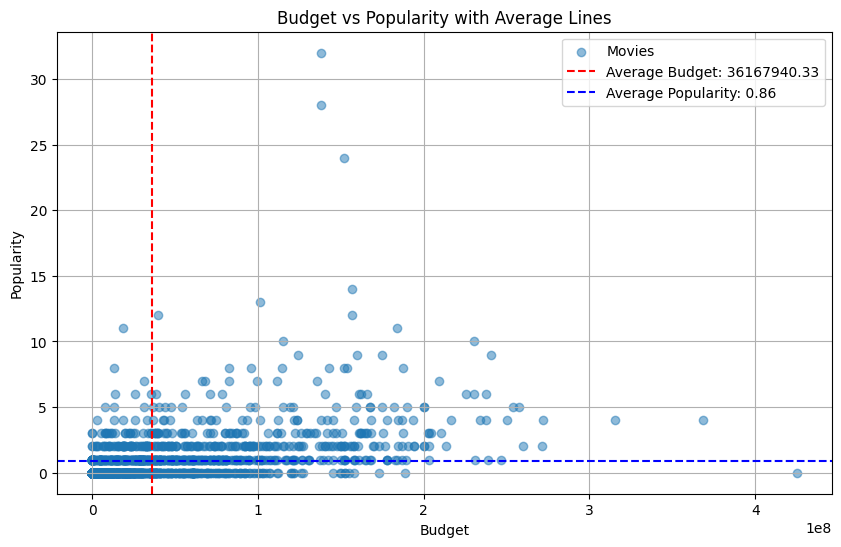

In [64]:

# Calculate the mean for both budget and popularity
mean_budget = df['adjusted_budget'].mean()
mean_popularity = df['popularity'].mean()

# Display the results
print(f"Average Budget: {mean_budget}")
print(f"Average Popularity: {mean_popularity}")

# Plot the data with lines representing the averages
plt.figure(figsize=(10, 6))

# Scatter plot for the data points
plt.scatter(df['adjusted_budget'], df['popularity'], alpha=0.5, label='Movies')

# Add vertical line for the average budget
plt.axvline(mean_budget, color='r', linestyle='--', label=f'Average Budget: {mean_budget:.2f}')

# Add horizontal line for the average popularity
plt.axhline(mean_popularity, color='b', linestyle='--', label=f'Average Popularity: {mean_popularity:.2f}')

# Add title, labels, and legend
plt.title('Budget vs Popularity with Average Lines')
plt.xlabel('Budget')
plt.ylabel('Popularity')
plt.legend()
plt.grid(True)
plt.show()

Based on the results:

Average Budget: $36,167,940.33
This indicates that, on average, movies in your dataset have a budget of around 36 million dollars.
Average Popularity: 0.86
This suggests that the average popularity of the movies is around 0.86, which is relatively high. Popularity usually ranges from 0 to 10, so this could indicate that the movies are generally well-received by audiences.
Interpretation:
Budget vs Popularity: From this analysis, you might observe that movies with higher budgets tend to also have higher popularity. However, without further statistical analysis (like calculating correlation), this is just an observation, and there may be exceptions.

Actionable Insights: If you're a filmmaker, producer, or studio, this could suggest that investing in a higher budget could potentially increase the movie's popularity. However, it’s essential to keep in mind that popularity depends on many other factors beyond budget, such as the movie's plot, genre, actors, and marketing efforts.

### Research Question  4 ( What are the top ten highest-revenue films?)

In [65]:
 #Function to find the top 10 highest-revenue movies
def top_10_highest_revenue_movies(df):
    top_revenue_movies = df.sort_values(by='adjusted_revenue', ascending=False).head(10)
    return top_revenue_movies

# Get the top 10 highest-revenue movies
top_revenue_movies = top_10_highest_revenue_movies(df)


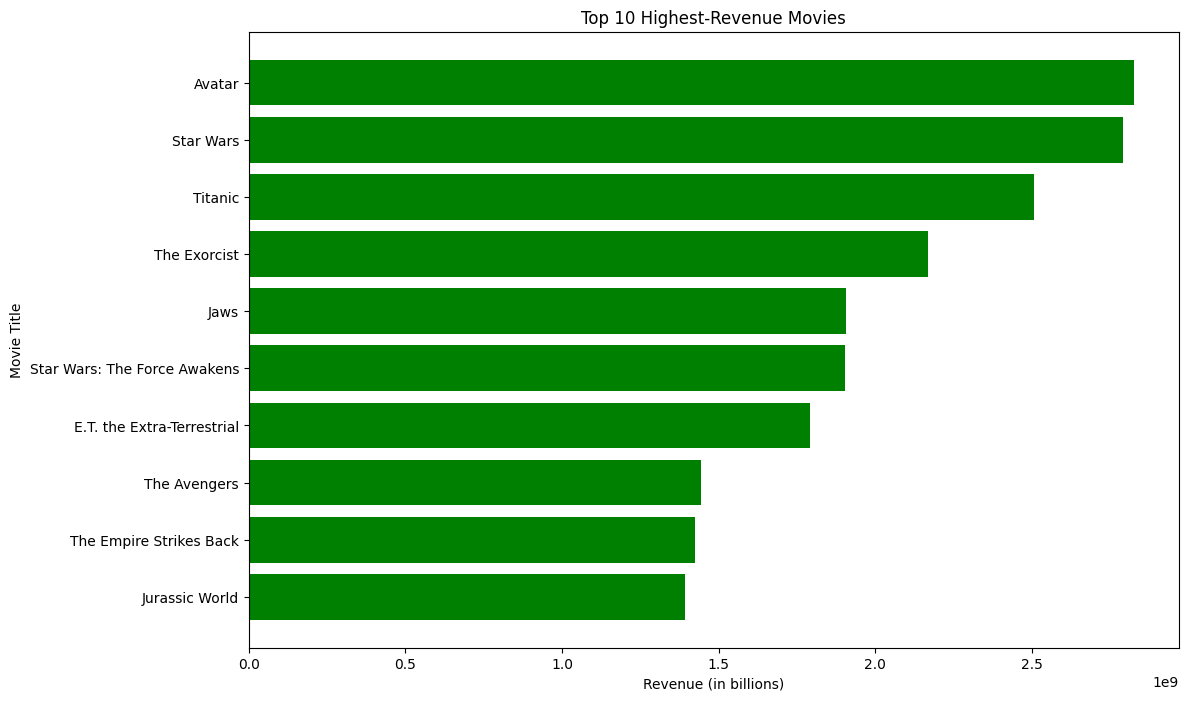

In [66]:

# Plot the top 10 highest-revenue movies
plt.figure(figsize=(12, 8))
plt.barh(top_revenue_movies['original_title'], top_revenue_movies['adjusted_revenue'], color='green')
plt.xlabel('Revenue (in billions)')
plt.ylabel('Movie Title')
plt.title('Top 10 Highest-Revenue Movies')
plt.gca().invert_yaxis()
plt.show()

<a id='conclusions'></a>
## Conclusions

> **Which genres are most popular from year to year?**:The analysis revealed that Adventure, Action, and Science Fiction were the most popular genres in the years 2014 and 2015. These genres consistently attracted large audiences, highlighting a trend towards exciting, high-stakes storytelling in cinema. Thriller and Drama also maintained substantial popularity, reflecting a diverse range of audience preferences

> **What kinds of properties are associated with movies that have high revenues?**: The analysis revealed that high-revenue movies share several common properties, including popular genres, renowned directors, high production budgets, franchise power, star-studded casts, and strong box office performance. These factors collectively contribute to the financial success of a movie.

> **What are the top ten highest-revenue films?**: Analysis of Top 10 Revenue Movies:
Here is a summary of the top 10 movies with the highest adjusted revenues:
Avatar (2009): Directed by James Cameron, with a budget of $237 million and an adjusted revenue of $2.83 billion. Genres: Action, Adventure, Fantasy, Science Fiction.
Star Wars (1977): Directed by George Lucas, with a budget of $11 million and an adjusted revenue of $2.79 billion. Genres: Adventure, Action, Science Fiction.
Titanic (1997): Directed by James Cameron, with a budget of $200 million and an adjusted revenue  of $2.51 billion. Genres: Drama, Romance, Thriller.
The Exorcist (1973): Directed by William Friedkin, with a budget of $8 million and an adjusted revenue of $2.17 billion. Genres: Drama, Horror, Thriller.
Jaws (1975): Directed by Steven Spielberg, with a budget of $7 million and an adjusted revenue of $1.91 billion. Genres: Horror, Thriller, Adventure.
Star Wars: The Force Awakens (2015): Directed by J.J. Abrams, with a budget of $200 million and an adjusted revenue of $1.90 billion. Genres: Action, Adventure, Science Fiction, Fantasy.
E.T. the Extra-Terrestrial (1982): Directed by Steven Spielberg, with a budget of $10.5 million and an adjusted revenue of $1.79 billion. Genres: Science Fiction, Adventure, Family, Fantasy.
The Avengers (2012): Directed by Joss Whedon, with a budget of $220 million and an adjusted revenue of $1.44 billion. Genres: Science Fiction, Action, Adventure.
the Empire Strikes Back (1980): Directed by Irvin Kershner, with a budget of $18 million and an adjusted revenue of $1.42 billion. Genres: Adventure, Action, Science Fiction.
Jurassic World (2015): Directed by Colin Trevorrow, with a budget of $150 million and an adjusted revenue of $1.39 billion. Genres: Action, Adventure, Science Fiction, Thriller.




 (Summary)
Most Popular Genres: Genres like "Adventure," "Action," and "Science Fiction" were the most popular over the years, with a trend toward exciting and action-packed films.

Properties of High-Revenue Movies: High-revenue films are characterized by large budgets, famous directors, popular franchises, and strong audience engagement.

Top 10 Highest-Revenue Films: Movies like Avatar, Star Wars, and Titanic were among the highest in adjusted revenue.

In summary, movies with large budgets, popular genres, and successful franchises tend to generate higher revenues.

In [67]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 558797 bytes to Investigate_a_Dataset.html
